In [33]:
from sklearn.covariance import GraphicalLasso, GraphicalLassoCV
import numpy as np
import pandas as pd
from sklearn.covariance import GraphicalLasso, GraphicalLassoCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
from IPython.display import clear_output
from time import sleep

import glob

## Data Processing

In [34]:
return_scale = 1
#Autocorrelation lags
lags = 20
lags_min = lags - lags
start_date = "2020-12-10"

In [35]:
d1_name ="Data/VIX_History*"
d1_filename = glob.glob(d1_name)[0]
d1= pd.read_csv(d1_filename)
d1['DATE'] = pd.to_datetime(d1["DATE"])
d1 = d1.set_index("DATE")
d1= d1.loc[start_date:]
d1 = d1.resample("1W").sum()
d1["VIX RETURNS"] = d1["CLOSE"] - d1["CLOSE"].shift(return_scale)
d1=d1.dropna()
d1= d1.rename(columns={"CLOSE": "VIX CLOSE"})

In [36]:
d1_ret = d1[["VIX RETURNS"]]

d1 = d1[["VIX CLOSE"]]

In [37]:
partial_name = f'Data/google*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])

In [38]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()

df_weekly.index.names = ["DATE"]

df_news=df_weekly

In [39]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = d1.merge(weekly_users, on="DATE")
df_returns= d1_ret.merge(weekly_returns, on="DATE")

In [40]:
partial_name = f'Data/google_bonds*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Bonds"]


In [41]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()

df_weekly.index.names = ["DATE"]

df_bonds = df_weekly

In [42]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

In [43]:
partial_name = f'Data/google_exchange*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Exchange Rate"]

In [44]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()
df_weekly.index.names = ["DATE"]

df_exchange  = df_weekly


In [45]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

In [46]:
partial_name = f'Data/google_interest*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Interest Rate"]

In [47]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()
df_weekly.index.names = ["DATE"]
df_interest=df_weekly


In [48]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

In [49]:
partial_name = f'Data/google_stock_market.csv'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
df_weekly.columns=["Stock Market"]

In [50]:
j = 0
for i in df_weekly.columns:
    col_title = i + " Returns"
    df_weekly[col_title] = df_weekly.iloc[:,0 + j] - df_weekly.iloc[:,0+ j].shift(return_scale)
    j += 1

df_weekly= df_weekly.dropna()

df_weekly.index.names = ["DATE"]

df_stock_market  = df_weekly


In [51]:
weekly_users = df_weekly.iloc[:,:1]
weekly_returns = df_weekly.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

In [52]:
d2_name ="Data/2_Day_Smooth_Metaculus_Users_*"
d2_filename = glob.glob(d2_name)[0]
d2= pd.read_csv(d2_filename)
d2.columns = d2.columns.str.upper()
d2['DATE'] = pd.to_datetime(d2["DATE"])
d2= d2.set_index("DATE")
d2.columns = ["META"]
d2_week = d2.resample("1W").sum()

d2_week["META RETURNS"] = d2_week["META"] - d2_week["META"].shift(return_scale)

In [53]:
weekly_users = d2_week.iloc[:,:1]
weekly_returns = d2_week.iloc[:,1:]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

In [54]:
d1_name ="Data/SPY_History*"
d1_filename = glob.glob(d1_name)[0]
d1= pd.read_csv(d1_filename)
d1['DATE'] = pd.to_datetime(d1["DATE"])
d1 = d1.set_index("DATE")
d1= d1.loc[start_date:]
d1 = d1.resample("1W").sum()
d1["SPY RETURNS"] = d1["CLOSE"] - d1["CLOSE"].shift(return_scale)
d1=d1.dropna()
d1= d1.rename(columns={"CLOSE": "SPY CLOSE"})


In [56]:
weekly_users = d1['SPY CLOSE']
weekly_returns = d1["SPY RETURNS"]

df_total = df_total.merge(weekly_users, on="DATE")
df_returns= df_returns.merge(weekly_returns, on="DATE")

In [57]:
df_total.head(10)

,VIX CLOSE,Searches,Bonds,Exchange Rate,Interest Rate,Stock Market,META,SPY CLOSE
DATE,,,,,,,,
2020-12-20,113.61,11,0,48,15,17,7744,1845.839996
2020-12-27,94.23,17,0,43,0,18,5775,1471.669982
2021-01-03,90.30,14,44,48,0,20,8943,1489.499999
2021-01-10,121.31,17,0,45,0,19,13565,1874.030000
2021-01-17,117.21,13,0,44,0,23,10210,1891.410003
2021-01-24,88.05,51,0,47,0,48,10105,1529.660004
2021-01-31,146.72,18,52,49,0,28,8739,1890.290040
2021-02-07,121.35,16,0,48,0,21,8051,1913.529998
2021-02-14,106.08,14,50,43,40,22,7811,1954.190003


In [58]:
df_returns.head(10)

,VIX RETURNS,Searches Returns,Bonds Returns,Exchange Rate Returns,Interest Rate Returns,Stock Market Returns,META RETURNS,SPY RETURNS
DATE,,,,,,,,
2020-12-20,67.78,-4.0,0.0,-3.0,-4.0,3.0,-1436.0,1112.809997
2020-12-27,-19.38,6.0,0.0,-5.0,-15.0,1.0,-1969.0,-374.170014
2021-01-03,-3.93,-3.0,44.0,5.0,0.0,2.0,3168.0,17.830017
2021-01-10,31.01,3.0,-44.0,-3.0,0.0,-1.0,4622.0,384.530001
2021-01-17,-4.10,-4.0,0.0,-1.0,0.0,4.0,-3355.0,17.380003
2021-01-24,-29.16,38.0,0.0,3.0,0.0,25.0,-105.0,-361.749999
2021-01-31,58.67,-33.0,52.0,2.0,0.0,-20.0,-1366.0,360.630036
2021-02-07,-25.37,-2.0,-52.0,-1.0,0.0,-7.0,-688.0,23.239958
2021-02-14,-15.27,-2.0,50.0,-5.0,40.0,1.0,-240.0,40.660005


## Graphical Lasso

### Timeseries

In [59]:
p1 = df_total

In [60]:
list(p1.columns)

['VIX CLOSE',
 'Searches',
 'Bonds',
 'Exchange Rate',
 'Interest Rate',
 'Stock Market',
 'META',
 'SPY CLOSE']

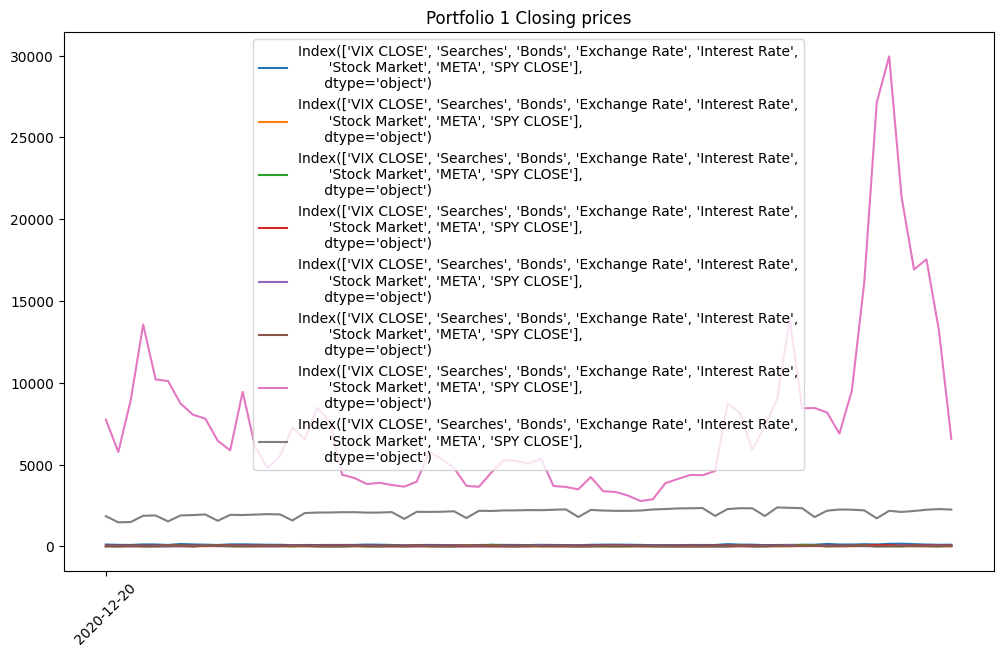

In [61]:
plt.figure(figsize=(12, 7))
plt.plot(p1, label = p1.columns)
plt.xlabel('')
_ = plt.xticks(p1.index[np.arange(0, len(p1.index), 100)], rotation=45)
_ = plt.title('Portfolio 1 Closing prices')
plt.legend()
plt.show()

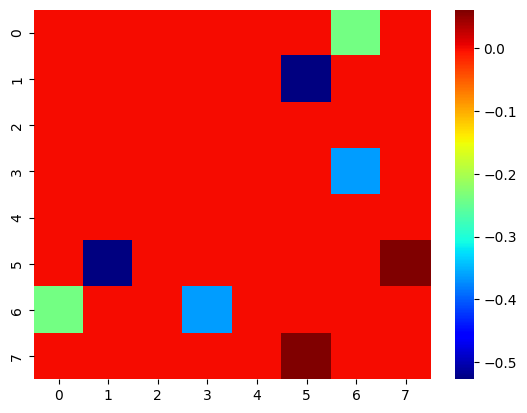

In [62]:
alpha = 0.4
X = np.array(p1)
p = X.shape[1]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
glasso = GraphicalLasso(alpha=alpha).fit(X)
Omegahat = np.around(glasso.precision_, decimals=5)

for j in np.arange(p):
    Omegahat[j,j] = 0
sns.heatmap(Omegahat, cmap='jet')
plt.show()

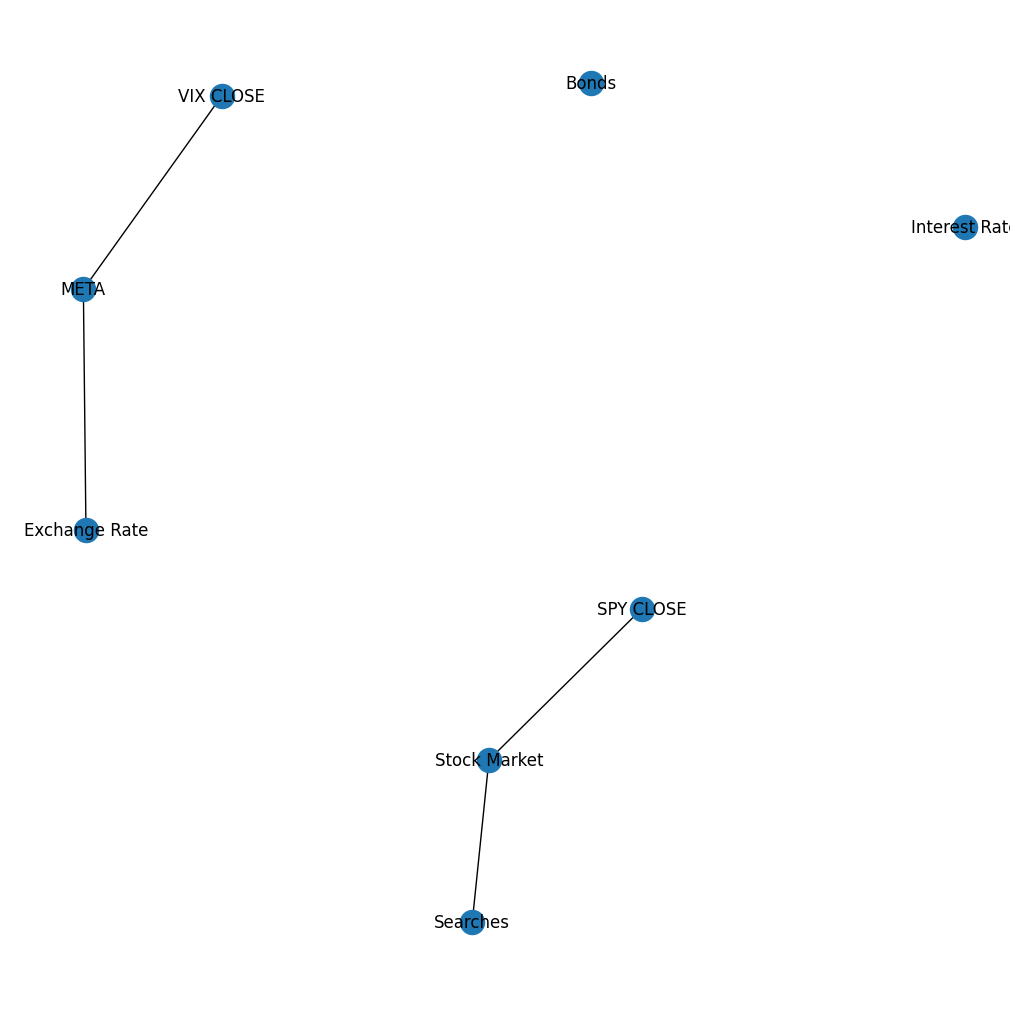

In [63]:
stocks = p1.columns

precdf = pd.DataFrame(Omegahat, columns=stocks, index=stocks)
links = precdf.stack().reset_index()

links.columns = ['var1', 'var2','value']
links=links.loc[(abs(links['value']) > 0.01) &  (links['var1'] != links['var2']) ]

#build the graph using networkx lib
G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
G.add_nodes_from(stocks)
pos = nx.spring_layout(G, k=1.7/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

### Returns

In [64]:
p1 = df_returns

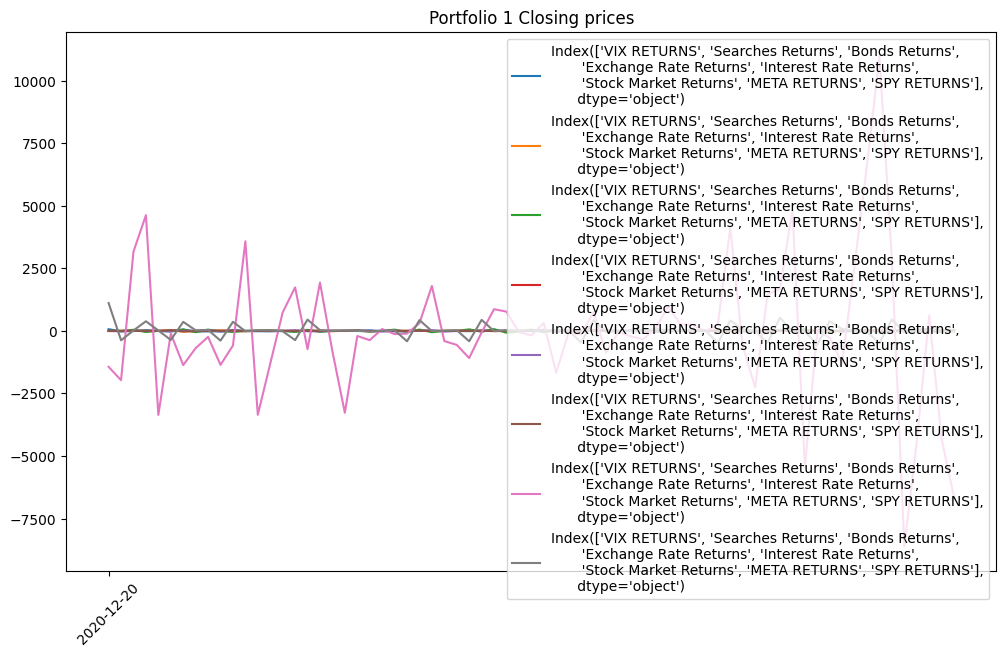

In [65]:
plt.figure(figsize=(12, 7))
plt.plot(p1, label = p1.columns)
plt.xlabel('')
_ = plt.xticks(p1.index[np.arange(0, len(p1.index), 100)], rotation=45)
_ = plt.title('Portfolio 1 Closing prices')
plt.legend()
plt.show()

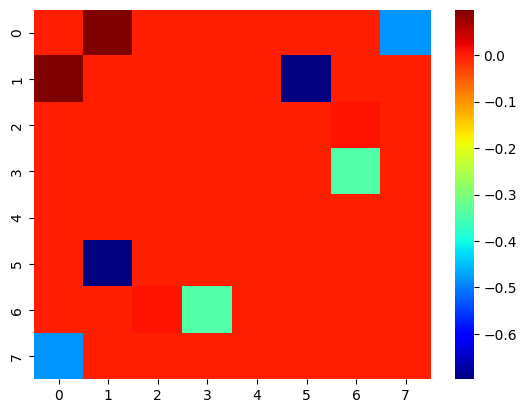

In [66]:
alpha= 0.25
X = np.array(p1)
p = X.shape[1]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
glasso = GraphicalLasso(alpha=alpha).fit(X)
Omegahat = np.around(glasso.precision_, decimals=5)

for j in np.arange(p):
    Omegahat[j,j] = 0
sns.heatmap(Omegahat, cmap='jet')
plt.show()

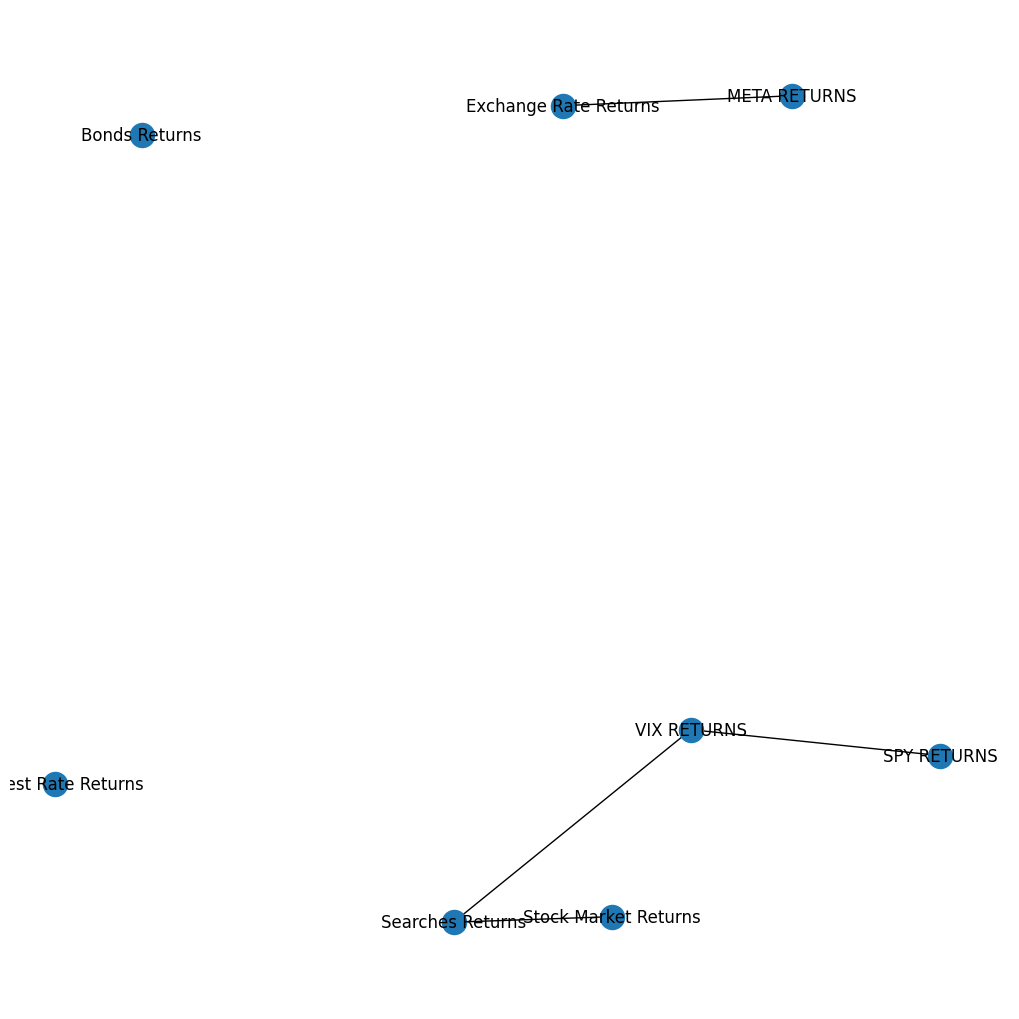

In [67]:
stocks = p1.columns

precdf = pd.DataFrame(Omegahat, columns=stocks, index=stocks)
links = precdf.stack().reset_index()

links.columns = ['var1', 'var2','value']
links=links.loc[(abs(links['value']) > 0.01) &  (links['var1'] != links['var2']) ]

#build the graph using networkx lib
G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
G.add_nodes_from(stocks)
pos = nx.spring_layout(G, k=1.7/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()